In [16]:
#importation des différentes librairies 
import pandas as pd
import numpy as np

#Importation des differents fichiers excel
erp = pd.read_excel(r'C:/Users/alois/Desktop/Formation Aloïs/Projet 5 - Bottleneck/erp.xlsx')
liaison = pd.read_excel(r'C:/Users/alois/Desktop/Formation Aloïs/Projet 5 - Bottleneck/liaison.xlsx')
web = pd.read_excel(r'C:/Users/alois/Desktop/Formation Aloïs/Projet 5 - Bottleneck/web.xlsx')

#Option pour pouvoir voir toutes les lignes des Dataframe
pd.set_option("max_rows", None)

In [15]:
#Ici on renomme la colonne id_web en sku sans recréer un Dataframe
liaison.rename(columns={'id_web': 'sku'}, inplace=True)

#Jointure interne entre le dataframe "liaison" et le dataframe "erp" sur la clé "product_id"
#Ici un dataframe nommé "liaison_joint" sera crée a partir des deux dataframes de la jointure précédente
liaison_joint = pd.merge (liaison, erp, on="product_id")

#Jointure interne entre le dataframe "liaison_joint" et le dataframe "web" sur la clé "sku"
#Ici on modifie le daframe "liaison_joint" en incluant une jointure en plus avec le dataframe "web"
liaison_joint  = pd.merge (liaison_joint , web, on='sku')

In [3]:
#On créer un dataframe nommé "liaison_ca_bp" où nous allons supprimer les doublons pour ne pas avoir d'erreur 
#sur le chiffre d'affaire
liaison_ca_bp = liaison_joint 
liaison_ca_bp.drop_duplicates(subset='product_id',inplace = True)

#Nous allons ensuite chercher le chiffre d'affaire pour chaque produits
#On crée pour cela une colonne Chiffe d'affaire par produit ("CA par produit") qui sera la multiplication 
#du prix du produit("price") par le nombre de ventes("total_sales") du produit effectuées
liaison_ca_bp['CA par produit'] = liaison_ca_bp['total_sales']*liaison_ca_bp['price']

#On affiche que certaines colonne (en rouge) du dataframe "liaison_ca_bp" pour plus de visibilité
liaison_ca_bp[['sku','product_id','price','total_sales','post_title','CA par produit']]

,sku,product_id,price,total_sales,post_title,CA par produit
0,15298,3847,24.20,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,145.2
2,15296,3849,34.30,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.0
4,15300,3850,20.80,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.0
6,19814,4032,14.10,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,42.3
8,19815,4039,46.00,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,0.0
10,15303,4040,34.30,0.0,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...,0.0
12,14975,4041,32.70,0.0,Pierre Gaillard Condrieu 2018,0.0
14,16042,4042,31.20,7.0,Pierre Gaillard Cornas 2017,218.4
16,14980,4043,60.00,3.0,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,180.0
18,16041,4045,42.60,14.0,Pierre Gaillard Côte Rôtie 2018,596.4


In [4]:
#On calcule ensuite le chiffe d'affaire globlale en faisant la somme de toutes les valeurs 
#de la colonne "CA par produit" et on affiche le résultat
liaison_ca_global = liaison_ca_bp['CA par produit'].sum()
liaison_ca_global

70568.6

In [5]:
#Pour déterminer si un produit est disponible sur le site web  nous allons d'abord afficher certaines colonne (en rouge) 
#du dataframe "liaison_ca_bp" pour plus de lisibilité
#Si "onsale_web" = 1 le produit est présent sur le site web 
#Si "onsale_web" = 0 le produit n'est pas disponible sur le site web
liaison_ca_bp[['sku','product_id','onsale_web','price','stock_quantity','stock_status','total_sales','CA par produit']]

,sku,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,CA par produit
0,15298,3847,1,24.20,0,outofstock,6.0,145.2
2,15296,3849,1,34.30,0,outofstock,0.0,0.0
4,15300,3850,1,20.80,0,outofstock,0.0,0.0
6,19814,4032,1,14.10,0,outofstock,3.0,42.3
8,19815,4039,1,46.00,0,outofstock,0.0,0.0
10,15303,4040,1,34.30,0,outofstock,0.0,0.0
12,14975,4041,1,32.70,15,instock,0.0,0.0
14,16042,4042,1,31.20,34,instock,7.0,218.4
16,14980,4043,1,60.00,12,instock,3.0,180.0
18,16041,4045,1,42.60,66,instock,14.0,596.4


In [6]:
#Ici nous allons remplacer les valeurs "NaN" par 0 pour pouvoir manipuler plus facilement le dataframe
#Nous allons ensuite créer un dataframe "produit_NOSKU" avec tous les produits qui ont un "sku" = 0 pour voir si 
#ces produits là sont disponible ou pas
liaison_ca_bp = liaison_ca_bp.fillna(0)
produit_NOSKU = liaison_ca_bp['sku'] == 0


In [17]:
#Nous allons ensuite créer un dataframe "produit_NOSKU_final" pour affiner encore plus la recherche avec pour condition
#que le "stock_status" soit égal à "instock"
#Nous allons donc avoir un dataframe comprenant les produits qui sont en stock
produit_NOSKU_final = liaison_ca_bp[produit_NOSKU]
produit_NOSKU_final = produit_NOSKU_final.loc[produit_NOSKU_final['stock_status'] == "instock"]
produit_NOSKU_final[['sku','product_id','onsale_web','price','stock_quantity','stock_status','total_sales','CA par produit']]

#Nous pouvons observer que ces produits sans SKU ne sont pas des produits disponibles sur le siteweb

#Nous allons ensuite calculer leurs chiffre d'affaire hypothétique ("Valeur hypothétique") en multipliant
#le prix du produit ("price") par sa quantité en stock ("stock_quantity")
produit_NOSKU_final['Valeur hypothétique'] = produit_NOSKU_final['price']*produit_NOSKU_final['stock_quantity']
produit_NOSKU_final[['sku','product_id','onsale_web','price','stock_quantity','stock_status','total_sales','CA par produit'
                     ,'Valeur hypothétique']]

,sku,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,CA par produit,Valeur hypothétique
718,0,4565,0,30.5,3,instock,0.0,0.0,91.5
803,0,4577,0,49.0,1,instock,0.0,0.0,49.0
888,0,4578,0,40.0,3,instock,0.0,0.0,120.0
1228,0,4692,0,12.0,48,instock,0.0,0.0,576.0
1398,0,4697,0,34.5,1,instock,0.0,0.0,34.5
1738,0,4738,0,13.5,3,instock,0.0,0.0,40.5
1823,0,4744,0,13.8,5,instock,0.0,0.0,69.0
2588,0,5560,0,47.0,62,instock,0.0,0.0,2914.0
2673,0,5569,0,19.9,1,instock,0.0,0.0,19.9
2843,0,5808,0,34.2,1,instock,0.0,0.0,34.2


In [8]:
#On calcule ensuite la somme de la colonne "Valeur hypothtétique" pour avoir la valeur financière total de ces produits
produit_NOSKU_final_global = produit_NOSKU_final["Valeur hypothétique"].sum()
produit_NOSKU_final_global

41000.8

In [9]:
#Pour revérifier le CA nous allons nous interesser aux produits qui ont le status d'être vendus sur le web 
#mais qui n'ont pas de "sku" correspondant
produit_NOSKU_final2 = liaison_ca_bp[produit_NOSKU]
produit_NOSKU_final2 = produit_NOSKU_final2.loc[produit_NOSKU_final2['onsale_web'] == 1]
produit_NOSKU_final2[['sku','product_id','onsale_web','price','stock_quantity','stock_status','total_sales','CA par produit']]

#Nous observons que ses produits n'ont pas été vendus 

,sku,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,CA par produit
973,0,4594,1,144.0,0,outofstock,0.0,0.0
2418,0,5070,1,84.7,0,outofstock,0.0,0.0
2503,0,5075,1,43.3,0,outofstock,0.0,0.0


In [10]:
#Nous voulons ensuite avoir les produits vendus sur le web et qui ont un "sku" correspondant
#Nous allons créer un dataframe "produit_prix" qui sera un dataframe avec tous les valeurs "sku" différentes de "0"
#Ce dataframe ne nous montre que les lignes où la condition est "vrai"
produit_prix = liaison_ca_bp['sku'] != 0

#C'est pourquoi nous allons créer un deuxième dataframe "produit_prix_final" qui nous affichera les valeurs que nous voulons
#nous affichons ensuite ce dataframe avec les colonnes qui nous intéresse (en rouge)
produit_prix_final = liaison_ca_bp[produit_prix]
produit_prix_final[['sku','product_id','onsale_web','price','stock_quantity','stock_status','total_sales','CA par produit']]

,sku,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,CA par produit
0,15298,3847,1,24.20,0,outofstock,6.0,145.2
2,15296,3849,1,34.30,0,outofstock,0.0,0.0
4,15300,3850,1,20.80,0,outofstock,0.0,0.0
6,19814,4032,1,14.10,0,outofstock,3.0,42.3
8,19815,4039,1,46.00,0,outofstock,0.0,0.0
10,15303,4040,1,34.30,0,outofstock,0.0,0.0
12,14975,4041,1,32.70,15,instock,0.0,0.0
14,16042,4042,1,31.20,34,instock,7.0,218.4
16,14980,4043,1,60.00,12,instock,3.0,180.0
18,16041,4045,1,42.60,66,instock,14.0,596.4


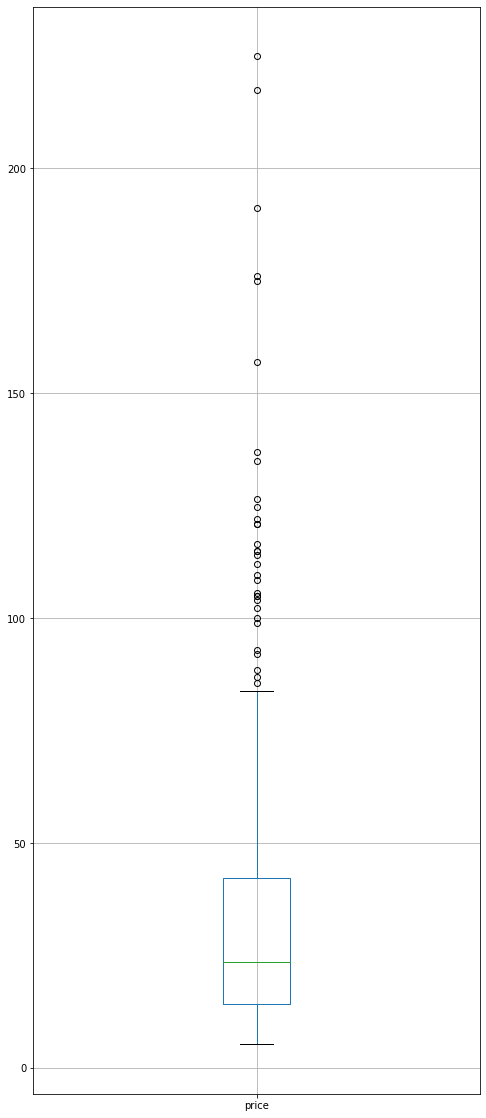

In [11]:
#Pour trouver d'éventuelles valeurs du prix ditent "aberrante" nous allons créer une boxplot 
#ou communément appelé boîte à moustache
#Cela va nous permettre de vérifier si certains produits n'ont pas une erreur de prix
affichage = produit_prix_final.boxplot(column = 'price',figsize=(8,20),return_type ='both')

In [13]:
#Ici nous allons calculer nous même les valeurs aberrantes 
#La médiane est representée en vert sur la graphique ci-dessus
#elle nous permet de savoir qu'il y a autant de valeurs de produit au dessus qu'en dessous de cette ligne
mediane = np.median(produit_prix_final['price'])

#Pour revenir aux erreurs abberantes nous avons besoins du premier quartile (Q1) et du troisième (Q3)

#le premier quartile est la valeur au dessous duquel se trouve 25% des valeurs des produits
Q1 = np.percentile(produit_prix_final['price'],25)
#le troisieme quartile est la valeur au dessous duquel se trouve 75% des valeurs des produits
Q3 = np.percentile(produit_prix_final['price'],75)

#Nous calculons ensuite l'écart interquartile (iqr)
#L'écart interquartile donne des informations sur la dispersion de la série autour des valeurs 
#les plus fréquentes prises par cette série.
iqr = Q3-Q1

#Nous calculons ensuite le minimum et le maximum qui représente les valeurs extrèmes à l'exclusion des valeurs aberrantes
minimum = Q1-(1.5*iqr)
maximum = Q3+(1.5*iqr)

#Nous allons ensuite créer un dataframe "outliers" qui aura pour condition de prendre les données supérieur au maximum calculé
#et inférieur au minimum calculé
#Nous allons ensuite affiché ce dataframe qui représente donc les valeurs aberrantes !
outliers =produit_prix_final[ (produit_prix_final['price']> maximum) | (produit_prix_final['price'] < minimum)]
outliers[['sku','product_id','post_title','onsale_web','price','stock_quantity','stock_status','total_sales','CA par produit']]

,sku,product_id,post_title,onsale_web,price,stock_quantity,stock_status,total_sales,CA par produit
7861,15382,4115,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,1,100.0,11,instock,0.0,0.0
7865,11668,4132,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,1,88.4,5,instock,0.0,0.0
8133,15940,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1,225.0,0,outofstock,5.0,1125.0
8137,12589,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1,126.5,2,instock,11.0,1391.5
8145,13853,4359,Champagne Larmandier-Bernier Grand Cru Les Che...,1,85.6,0,outofstock,1.0,85.6
8171,3510,4402,Cognac Frapin VIP XO,1,176.0,8,instock,13.0,2288.0
8173,3507,4404,Cognac Frapin Château de Fontpinot XO,1,108.5,2,instock,2.0,217.0
8177,7819,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,1,157.0,3,instock,0.0,0.0
8179,3509,4407,Cognac Frapin Cigar Blend,1,104.0,6,instock,1.0,104.0
8189,12857,4582,Château de Meursault Puligny-Montrachet 1er Cr...,1,109.6,7,instock,0.0,0.0
